In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\11. Regression\\Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


# EDA

In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147042.500000,23264.000000,30554.000000,14022.500000
std,85854.236315,14846.809176,21778.620839,5217.456566
min,700.000000,0.000000,300.000000,1600.000000
25%,74375.000000,9975.000000,12750.000000,10375.000000
50%,149750.000000,22900.000000,25750.000000,12900.000000
75%,218825.000000,36525.000000,45100.000000,17400.000000
max,296400.000000,49600.000000,114000.000000,27000.000000


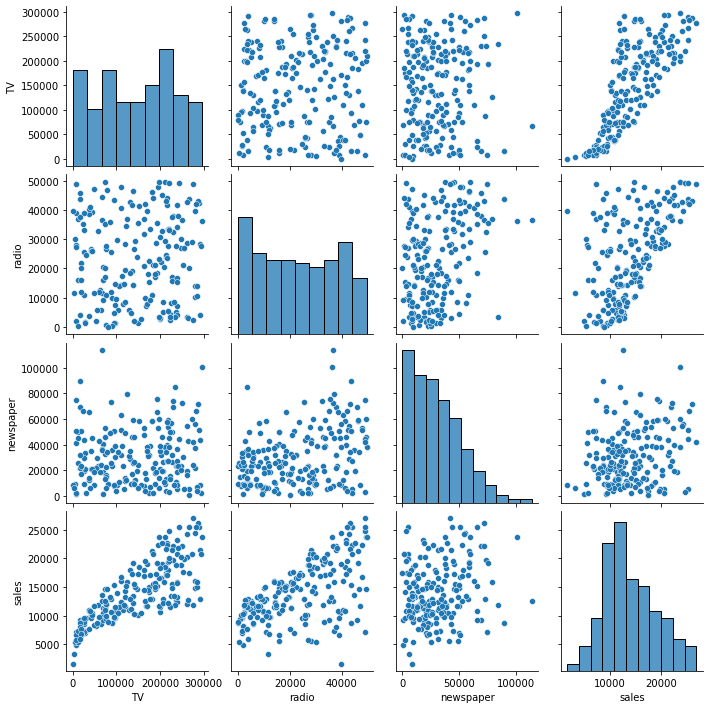

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [7]:
X = df.drop(columns='sales')

In [8]:
y=df.sales

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

# lasso regression

## modeling with default parameter

In [10]:
from sklearn.linear_model import Lasso

lasso_model=Lasso()
lasso_model.fit(X_train,y_train)

Lasso()

## prediction

In [11]:
test_prediction=lasso_model.predict(X_test)

train_prediction=lasso_model.predict(X_train)

## evaluation

In [12]:
from sklearn.metrics import mean_squared_error
train_rsme=np.sqrt(mean_squared_error(y_train,train_prediction))

test_rsme=np.sqrt(mean_squared_error(y_test,test_prediction))

print(train_rsme)
print(test_rsme)

1574.596830590546
1948.5371732825658


In [13]:
test_r2=lasso_model.score(X_test,y_test)
train_r2=lasso_model.score(X_train,y_train)
print(train_r2)
print(test_r2)

0.9055159502227751
0.8609466552563986


In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
scores= cross_val_score(lasso_model,X,y,cv=5)
print(scores)
scores.mean()

[0.87865198 0.91763212 0.92933032 0.81443905 0.89547828]


0.8871063511014737

# hyperparameter Tuning

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
estimator=Lasso()
param_grid={'alpha':[0.1,0.2,.3,.4,.5,.6,.7,.8,.9,1,2,3,4,5,10,12,15,20]}

In [18]:
model_hp=GridSearchCV(estimator,param_grid,cv=5)

model_hp.fit(X_train,y_train)

model_hp.best_params_

{'alpha': 20}

## final model Lasso

In [19]:
final_model_lasso = Lasso(alpha=2)

final_model_lasso.fit(X_train,y_train)

test_prediction=final_model_lasso.predict(X_test)
train_prediction=final_model_lasso.predict(X_train)

test_r2=final_model_lasso.score(X_test,y_test)
train_r2=final_model_lasso.score(X_train,y_train)
print(train_r2)
print(test_r2)

scores= cross_val_score(final_model_lasso,X,y,cv=5)
print(scores)
scores.mean()

0.9055159502227745
0.8609466596228621
[0.87865198 0.91763212 0.92933033 0.81443905 0.89547828]


0.8871063524774605

# Ridge Regression
**modelling with default parameters**

In [20]:
from sklearn.linear_model import Ridge

ridge_model=Ridge()

ridge_model.fit(X_train,y_train)

Ridge()

## prediction

In [21]:
test_pred= ridge_model.predict(X_test)
train_pred=ridge_model.predict(X_train)

In [22]:
ridge_model.intercept_

2708.949092636889

In [23]:
ridge_model.coef_

array([0.04405928, 0.1992875 , 0.00688245])

## evaluation

In [24]:
train_r2=ridge_model.score(X_train,y_train)
test_r2=ridge_model.score(X_test,y_test)
print(train_r2)
print(test_r2)

0.9055159502227753
0.8609466508268961


**cross_validation_score**

In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(ridge_model,X,y,cv=5)
print(score)

score.mean()

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]


0.8871063495442719

**RSME**

In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
train_rsme=np.sqrt(mean_squared_error(y_train,train_pred))
test_rsme=np.sqrt(mean_squared_error(y_test,test_pred))
print(train_rsme)
print(test_rsme)

1574.5968305905444
1948.5372043175978


# hyperparameter Tuning ridge 

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
estimator=Ridge()

param_grid={'alpha':list(range(1,100))}

In [30]:
model_hp = GridSearchCV(estimator,param_grid,cv=5)

model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 99}

# final_model ridge 

In [31]:
final_model_hp=GridSearchCV(estimator,param_grid={'alpha': [99]}
,cv=5)

In [32]:
final_model_ridge=Ridge(alpha=99)

final_model_ridge.fit(X_train,y_train)

test_pred= final_model_ridge.predict(X_test)
train_pred=final_model_ridge.predict(X_train)


train_r2=final_model_ridge.score(X_train,y_train) # train r2
test_r2=final_model_ridge.score(X_test,y_test)# test r2
print(train_r2)
print(test_r2)

score=cross_val_score(final_model_ridge,X,y,cv=5)## cv
print(score)

print(score.mean())

train_rsme=np.sqrt(mean_squared_error(y_train,train_pred))
test_rsme=np.sqrt(mean_squared_error(y_test,test_pred))
print(train_rsme)
print(test_rsme)

0.9055159502227753
0.8609466512051136
[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
0.8871063495862626
1574.5968305905444
1948.5372016676415


# Elasticnet Regression

**modeling with default parameter**

In [33]:
from sklearn.linear_model import ElasticNet

enr_model = ElasticNet()

enr_model.fit(X_train,y_train)

ElasticNet()

## prediction

In [34]:
test_prediction = enr_model.predict(X_test)
train_prediction = enr_model.predict(X_train)

**RMSE**

In [35]:
train_rsme=np.sqrt(mean_squared_error(y_train,train_prediction))
test_rsme=np.sqrt(mean_squared_error(y_test,test_prediction))
print(train_rsme)
print(test_rsme)

1574.5968305905449
1948.5371869557355


**CV_SCORE**

In [36]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(enr_model,X,y,cv=5)
print(score)

print(score.mean())

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
0.8871063503860496


In [37]:
test_r2=enr_model.score(X_test,y_test)
train_r2=enr_model.score(X_train,y_train)
print(test_r2)
print(train_r2)

0.8609466533048833
0.9055159502227752


# hyperparameter tuning

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
estimator= ElasticNet()

param_grid= {'alpha':[0.1,0.2,0.4,0.5,1,2,3,4,9,20],'l1_ratio':[1,2,3,4,5,8,9,5,12]}

In [40]:
enr_hp=GridSearchCV(estimator,param_grid,cv=5)

enr_hp.fit(X_train,y_train)

enr_hp.best_params_

{'alpha': 20, 'l1_ratio': 1}

# final model section elasticnet

In [41]:
final_model_elasticnet=ElasticNet(alpha=20,l1_ratio=1)

final_model_elasticnet.fit(X_train,y_train)

test_pred= final_model_elasticnet.predict(X_test)
train_pred=final_model_elasticnet.predict(X_train)


train_r2=final_model_elasticnet.score(X_train,y_train) # train r2
test_r2=final_model_elasticnet.score(X_test,y_test)# test r2
print(train_r2)
print(test_r2)

score=cross_val_score(final_model_elasticnet,X,y,cv=5)## cv
print(score)
print(score.mean())

train_rsme=np.sqrt(mean_squared_error(y_train,train_pred))# train r2
test_rsme=np.sqrt(mean_squared_error(y_test,test_pred)) # test r2
print(train_rsme)
print(test_rsme)

0.9055159502226932
0.8609467389338016
[0.87865202 0.91763213 0.92933035 0.81443918 0.89547823]
0.8871063798849663
1574.596830591229
1948.5365870019727
